# 자이로센서 오토바이 데이터 분석 들어갑시다

In [2]:
# 우선 4분위로 나눌 값을 먼저 구합시다. ==> X 변화량

import pandas as pd

# 데이터 불러오기
gyro_df = pd.read_csv("./data/gyro/오토바이.csv", sep=";")

display(gyro_df)

# 정규화용 평균 및 표준편차 구하기
print("X 평균 :",  gyro_df['accel_xout'].mean())
print("X 표준편차 :",  gyro_df['accel_xout'].std())
print("Y 평균 :",  gyro_df['accel_yout'].mean())
print("Y 표준편차 :",  gyro_df['accel_yout'].std())
print("Z 평균 :",  gyro_df['accel_zout'].mean())
print("Z 표준편차 :",  gyro_df['accel_zout'].std())

# 정규화하기
def standard_scaling(df, scale_columns):
    for col in scale_columns:
        series_mean = df[col].mean()
        series_std = df[col].std()
        df[col] = df[col].apply(lambda x: (x-series_mean)/series_std)
    return df

scale_columns = ['gyro_xout', 'gyro_yout', 'gyro_zout', 'accel_xout', 'accel_yout', 'accel_zout']
gyro_data = standard_scaling(gyro_df, scale_columns)


print("X 정규화 평균 :",  gyro_df['accel_xout'].mean())
print("X 정규화 표준편차 :",  gyro_df['accel_xout'].std())
print("Y 정규화 평균 :",  gyro_df['accel_yout'].mean())
print("Y 정규화 표준편차 :",  gyro_df['accel_yout'].std())
print("Z 정규화 평균 :",  gyro_df['accel_zout'].mean())
print("Z 정규화 표준편차 :",  gyro_df['accel_zout'].std())

# 변화량 컬럼 넣어주기
variance_list = []
for i in range(len(gyro_data)) :
    try :
        variance = gyro_data.iloc[i+1,4] - gyro_data.iloc[i,4]
        variance_list.append(abs(variance))
    except :
        variance_list.append(0)
        
gyro_data['X변화량'] = variance_list


variance_list2 = []
for i in range (len(gyro_data)):
    try :
        variance2 = gyro_data.iloc[i+1,5] - gyro_data.iloc[i,5]
        variance_list2.append(abs(variance2))
    except :
        variance_list2.append(0)
        
gyro_data['Y변화량'] = variance_list2


variance_list3 = []
for i in range (len(gyro_data)):
    try :
        variance3 = gyro_data.iloc[i+1,6] - gyro_data.iloc[i,6]
        variance_list3.append(abs(variance3))
    except :
        variance_list3.append(0)
        
gyro_data['Z변화량'] = variance_list3


# 확인
display(gyro_data)

,1,gyro_xout,gyro_yout,gyro_zout,accel_xout,accel_yout,accel_zout
0,14731,151,381,160,3592,-1252,14984
1,14732,155,429,128,3220,-1748,14896
2,14733,47,357,99,3332,-1796,15708
3,14734,289,472,165,3324,-848,14880
4,14735,149,390,155,3484,-1724,15004
...,...,...,...,...,...,...,...
1164,15895,837,-279,348,-2640,9876,18192
1165,15896,872,474,512,5280,14532,11908
1166,15897,367,-39,513,-616,13512,18240
1167,15898,1183,119,531,-5548,-6148,12780


X 평균 : 2345.1668092386653
X 표준편차 : 2658.719785472804
Y 평균 : -1240.174508126604
Y 표준편차 : 3416.3412833090006
Z 평균 : 15451.028229255775
Z 표준편차 : 3664.1784185455954
X 정규화 평균 : 4.8625679093933287e-17
X 정규화 표준편차 : 1.0
Y 정규화 평균 : 1.2156419773483322e-17
Y 정규화 표준편차 : 1.0
Z 정규화 평균 : -2.0665913614921648e-16
Z 정규화 표준편차 : 1.0


,1,gyro_xout,gyro_yout,gyro_zout,accel_xout,accel_yout,accel_zout,X변화량,Y변화량,Z변화량
0,14731,-0.014021,-0.135705,0.166889,0.468960,-0.003461,-0.127458,0.139917,0.145185,0.024016
1,14732,-0.007533,-0.001955,0.114976,0.329043,-0.148646,-0.151474,0.042126,0.014050,0.221605
2,14733,-0.182711,-0.202581,0.067930,0.371169,-0.162696,0.070131,0.003009,0.277490,0.225972
3,14734,0.209818,0.117864,0.175000,0.368160,0.114794,-0.155841,0.060179,0.256415,0.033841
4,14735,-0.017265,-0.110627,0.158778,0.428339,-0.141621,-0.122000,0.016549,0.043321,0.158289
...,...,...,...,...,...,...,...,...,...,...
1164,15895,1.098684,-1.974780,0.471877,-1.875025,3.253824,0.748045,2.978877,1.362861,1.714982
1165,15896,1.155455,0.123437,0.737930,1.103852,4.616686,-0.966937,2.217609,0.298565,1.728082
1166,15897,0.336335,-1.306026,0.739552,-1.113757,4.318121,0.761145,1.855028,5.754694,1.490102
1167,15898,1.659903,-0.865762,0.768753,-2.968785,-1.436574,-0.728957,3.941747,5.289870,4.855659


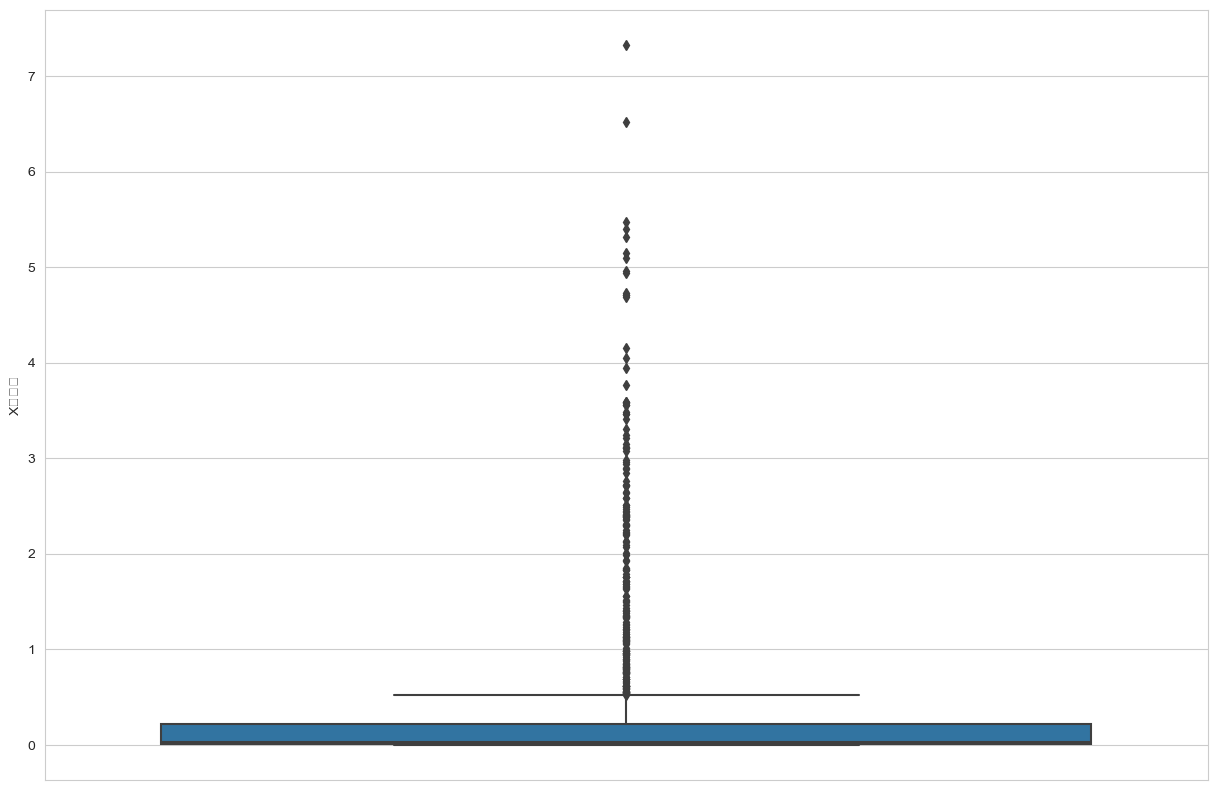

In [18]:
# 박스플롯으로 파악

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# 한글 및 마이너스 부호 깨짐현상 방지
from matplotlib import font_manager, rc
font_path = "./data/malgun.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font_name)
plt.rcParams['font.family'] = font_name
plt.rcParams['axes.unicode_minus'] = False # 마이너스부호 출력설정

sns.set_style('whitegrid')

fig = plt.figure(figsize=(15,10))

sns.boxplot(y='X변화량', data=gyro_data)
plt.show()


# 이상치 가 시작되는 부분을 찾아서 alert 함수 변수로 넣자

In [4]:
# X 값을 구해봅시다.

X_Q1 = gyro_data['X변화량'].quantile(.25)
X_Q2 = gyro_data['X변화량'].quantile(.5)
X_Q3 = gyro_data['X변화량'].quantile(.75)
X_Q4 = gyro_data['X변화량'].quantile(1)
X_IQR = X_Q3 - X_Q1 # IQR은 4분위 범위를 말한다.

# 제3사분위수 + 1.5*사분위범위
X_outlier = X_Q3 + 1.5*X_IQR

print("X변화량 1분위 값 :",X_Q1)
print("X변화량 2분위 값 :",X_Q2)
print("X변화량 3분위 값 :",X_Q3)
print("X변화량 4분위 값 :",X_Q4)
print("X변화량 이상치 범위 시작 :",X_outlier)

# 이상치는 어떤 게 제일 좋을까

X변화량 1분위 값 : 0.013540351336272183
X변화량 2분위 값 : 0.033098636599776465
X변화량 3분위 값 : 0.21815010486216313
X변화량 4분위 값 : 7.326834556405064
X변화량 이상치 범위 시작 : 0.5250647351509996


In [5]:
# Y 값을 구해봅시다.

Y_Q1 = gyro_data['Y변화량'].quantile(.25)
Y_Q2 = gyro_data['Y변화량'].quantile(.5)
Y_Q3 = gyro_data['Y변화량'].quantile(.75)
Y_Q4 = gyro_data['Y변화량'].quantile(1)
Y_IQR = Y_Q3 - Y_Q1 # IQR은 4분위 범위를 말한다.

# 제3사분위수 + 1.5*사분위범위
Y_outlier = Y_Q3 + 1.5*Y_IQR

print("Y변화량 1분위 값 :",Y_Q1)
print("Y변화량 2분위 값 :",Y_Q2)
print("Y변화량 3분위 값 :",Y_Q3)
print("Y변화량 4분위 값 :",Y_Q4)
print("Y변화량 이상치 범위 시작 :",Y_outlier)

# 이상치는 어떤 게 제일 좋을까

Y변화량 1분위 값 : 0.00819590248105416
Y변화량 2분위 값 : 0.021075177808424994
Y변화량 3분위 값 : 0.26109803618215405
Y변화량 4분위 값 : 8.967488157484834
Y변화량 이상치 범위 시작 : 0.6404512367338038


In [6]:
count = 0
for variance in gyro_data['X변화량']:
    if variance > X_outlier*2 :
#         print("안전운전하세욧!!!!")
        count += 1
    else : 
        pass
#         print("keep going baby")
        
print(count) 
# X_outlier로 사용하면 314이고 / 주호가 실제 이상치를 만든 값은 36개이다. (사실 이상치라기보다 변화값 )
# X_outlier*3 으로 하면 2개
# X_outlier*2 으로 하면 35개
# X_Q3로 하면 1679개
# X_Q3*3 으로 하면 123개

138


In [7]:
count = 0
for variance in gyro_data['Y변화량']:
    if variance > Y_outlier :
#         print("안전운전하세욧!!!!")
        count += 1
    else : 
        pass
#         print("keep going baby")
        
print(count) 
# Y_outlier로 사용하면 430개이고 / 주호가 실제 이상치를 만든 값은 36개이다. (사실 이상치라기보다 변화값 )
# Y_outlier*3 으로 하면 23개
# Y_outlier*2 으로 하면 98개
# Y_Q3로 하면 1678개
# Y_Q3*3 으로 하면 234개

236


# 데이터 시각화

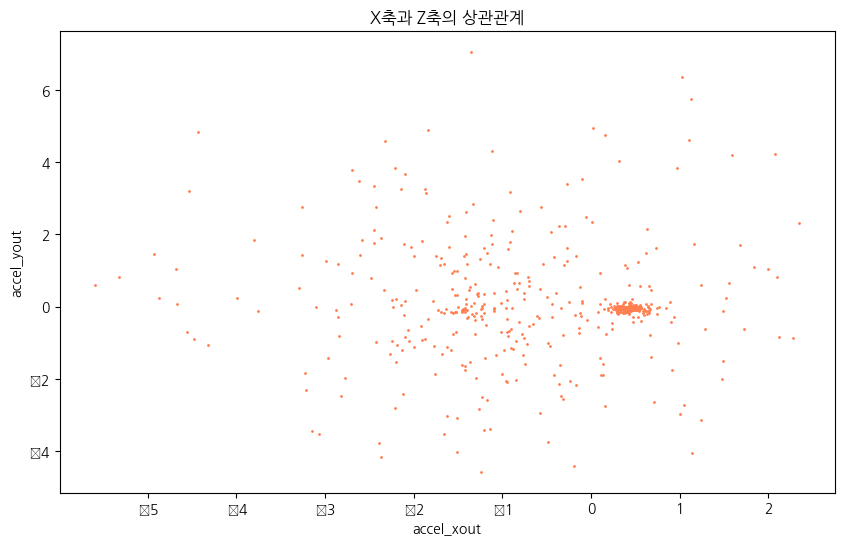

In [8]:
# 산점도부터 그려보자!!

# 먼저 accel_xout과 accel_zout을 산점도를 그려보자
plt.style.use('default')

gyro_data.plot(kind='scatter', x='accel_xout', y='accel_yout', c='coral', s=1, figsize=(10,6))
# plt.xlim(0, 1)
# plt.ylim(0, 0.5)
plt.title('X축과 Z축의 상관관계')
plt.show()

In [14]:
# 라벨링해서 데이터를 만들어보자 ==> 어차피 비지도학습으로는 절대 못해 / good, bad로 나눠서 하자

gyro_data['label']="good"

for k in range(len(gyro_data)):
    if gyro_data.iloc[k,4] > (X_outlier)*3 :
        gyro_data.iloc[k,10] = "bad"
    if gyro_data.iloc[k,4] < -(X_outlier)*3 :
        gyro_data.iloc[k,10] = "bad"
    if gyro_data.iloc[k,5] > (Y_outlier)*3 :
        gyro_data.iloc[k,10] = "bad"
    if gyro_data.iloc[k,5] < -(Y_outlier)*3 :
        gyro_data.iloc[k,10] = "bad"
    
display(gyro_data)

gyro_data.groupby("label").get_group("bad")


,1,gyro_xout,gyro_yout,gyro_zout,accel_xout,accel_yout,accel_zout,X변화량,Y변화량,Z변화량,label
0,14731,-0.014021,-0.135705,0.166889,0.468960,-0.003461,-0.127458,0.139917,0.145185,0.024016,good
1,14732,-0.007533,-0.001955,0.114976,0.329043,-0.148646,-0.151474,0.042126,0.014050,0.221605,good
2,14733,-0.182711,-0.202581,0.067930,0.371169,-0.162696,0.070131,0.003009,0.277490,0.225972,good
3,14734,0.209818,0.117864,0.175000,0.368160,0.114794,-0.155841,0.060179,0.256415,0.033841,good
4,14735,-0.017265,-0.110627,0.158778,0.428339,-0.141621,-0.122000,0.016549,0.043321,0.158289,good
...,...,...,...,...,...,...,...,...,...,...,...
1164,15895,1.098684,-1.974780,0.471877,-1.875025,3.253824,0.748045,2.978877,1.362861,1.714982,bad
1165,15896,1.155455,0.123437,0.737930,1.103852,4.616686,-0.966937,2.217609,0.298565,1.728082,bad
1166,15897,0.336335,-1.306026,0.739552,-1.113757,4.318121,0.761145,1.855028,5.754694,1.490102,bad
1167,15898,1.659903,-0.865762,0.768753,-2.968785,-1.436574,-0.728957,3.941747,5.289870,4.855659,bad


,1,gyro_xout,gyro_yout,gyro_zout,accel_xout,accel_yout,accel_zout,X변화량,Y변화량,Z변화량,label
842,15573,0.099520,0.875786,0.350206,2.277349,-0.871056,-2.132819,3.145875,1.529121,3.179976,bad
857,15588,-0.049705,3.692914,0.835267,-1.783252,0.153432,0.158554,0.052657,0.502292,0.198680,bad
858,15589,-0.357889,1.842693,0.037107,-1.835909,-0.348860,-0.040126,0.517542,0.435554,0.158289,bad
862,15593,0.029774,0.700238,0.037107,-1.577138,-0.145133,-0.016110,0.156466,0.003513,0.041483,bad
866,15597,-0.070792,0.817270,0.045218,-1.658380,-0.168550,-0.027026,0.210628,0.717727,0.743414,bad
...,...,...,...,...,...,...,...,...,...,...,...
1164,15895,1.098684,-1.974780,0.471877,-1.875025,3.253824,0.748045,2.978877,1.362861,1.714982,bad
1165,15896,1.155455,0.123437,0.737930,1.103852,4.616686,-0.966937,2.217609,0.298565,1.728082,bad
1166,15897,0.336335,-1.306026,0.739552,-1.113757,4.318121,0.761145,1.855028,5.754694,1.490102,bad
1167,15898,1.659903,-0.865762,0.768753,-2.968785,-1.436574,-0.728957,3.941747,5.289870,4.855659,bad


<Figure size 1000x600 with 0 Axes>

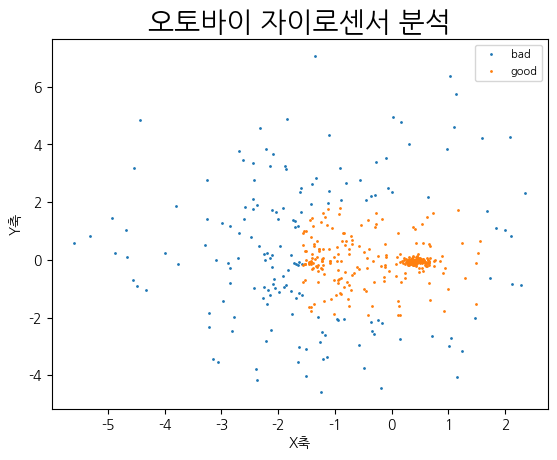

In [20]:
# 참고사이트 : https://rfriend.tistory.com/414

# Scatter plot with a different color by groups

groups = gyro_data.groupby('label')
plt.figure(figsize=(10,6))
plt.style.use('default')


fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.accel_xout, 
            group.accel_yout, 
            marker='o', 
            markersize=1,
            linestyle='',
            label=name)

ax.legend(fontsize=8, loc='upper right') # legend position
plt.title('오토바이 자이로센서 분석', fontsize=20)
plt.xlabel('X축', fontsize=10)
plt.ylabel('Y축', fontsize=10)

matplotlib.rcParams['axes.unicode_minus'] = False

plt.show()

<Figure size 1000x600 with 0 Axes>

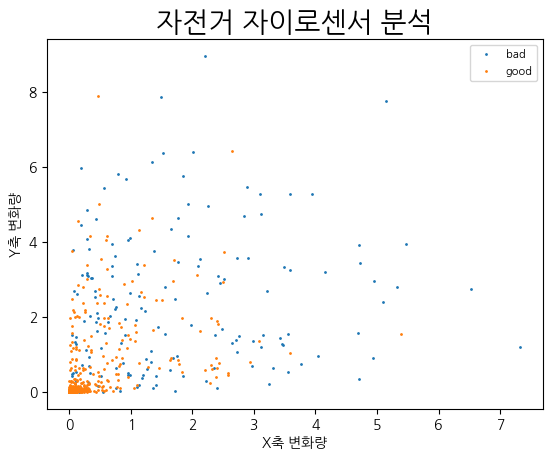

In [16]:
# 참고사이트 : https://rfriend.tistory.com/414

# Scatter plot with a different color by groups

groups = gyro_data.groupby('label')
plt.figure(figsize=(10,6))
plt.style.use('default')


fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.X변화량, 
            group.Y변화량, 
            marker='o', 
            markersize=1,
            linestyle='',
            label=name)

ax.legend(fontsize=8, loc='upper right') # legend position
plt.title('자전거 자이로센서 분석', fontsize=20)
plt.xlabel('X축 변화량', fontsize=10)
plt.ylabel('Y축 변화량', fontsize=10)
plt.show()